In [18]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhritiwasan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dhritiwasan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
import os
import gensim

# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)  

stop_words = set(stopwords.words('english')) 

In [57]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()
lemma = WordNetLemmatizer()

In [91]:
words = set()

for f in sorted(os.listdir('songs')):
    if f[0] == '.':
        continue
    
    for i, l in enumerate(open('songs/' + f, 'r').readlines()):
        
        if i < 2:
            continue
        
        arr = word_tokenize(l)
        for a in arr:
            a = lemma.lemmatize(a.lower())
            if "'" in a:
                continue
            if len(a) < 3:
                continue
            if not a in model.vocab:
                continue
            if a in stop_words:
                continue
            words.add(a)

print(words)

{'join', 'made', 'life', 'passed', 'merry', 'delightful', 'ahead', 'citizen', 'forevermore', 'esplanade', 'winding', 'beat', 'bring', 'happen', 'low', 'sure', 'free', 'think', 'determination', 'higher', 'kept', 'tell', 'limit', 'west', 'everything', 'time', 'catch', 'side', 'done', 'knew', 'even', 'hear', 'closest', 'never', 'forward', 'win', 'surely', 'shine', 'anything', 'hope', 'homeland', 'start', 'precious', 'bang', 'surprise', 'friend', 'spot', 'share', 'youll', 'prosperity', 'bombay', 'living', 'moving', 'fire', 'tame', 'perfect', 'pledge', 'experienced', 'peaceful', 'afraid', 'take', 'glory', 'sunrise', 'amazing', 'joy', 'wait', 'arising', 'strive', 'star', 'country', 'united', 'special', 'million', 'raise', 'snow', 'many', 'storm', 'reaching', 'head', 'face', 'tomorrow', 'dot', 'river', 'beyond', 'anew', 'exicted', 'people', 'tranquil', 'forever', 'swim', 'stride', 'heart', 'stay', 'lamp', 'danced', 'religion', 'little', 'open', 'youre', 'dozen', 'braved', 'around', 'great', '

In [92]:
import numpy as np
import copy

centroids = np.zeros((len(words), 300))

for i, w in enumerate(words):
    centroids[i] = model[w]
    

In [93]:
dist = np.zeros((len(words), len(words)))
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i, j] = np.linalg.norm(centroids[i] - centroids[j])
out = open('dist.txt', 'w')
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        out.write(str(dist[i, j]).ljust(20) + ' ')
    out.write('\n')
out.close()

In [94]:
dist.shape

(544, 544)

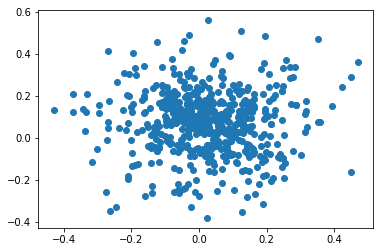

In [95]:
import matplotlib.pyplot as plt

plt.plot(centroids[:,2], centroids[:,3], 'o')
plt.show()

In [96]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=50).fit(centroids)
labels = gmm.predict(centroids)
mapping = {}
for s, l in sorted(zip(words, labels), key = lambda x: x[1]):
    mapping[s] = l

In [97]:
songs = sorted(os.listdir('songs'))
mfw = np.zeros((len(songs), 50))

for index, f in enumerate(songs):
    if f[0] == '.':
        continue
    
    for i, l in enumerate(open('songs/' + f, 'r').readlines()):
        
        if i < 2:
            continue
        
        arr = word_tokenize(l)
        for a in arr:
            a = lemma.lemmatize(a.lower())
            if "'" in a:
                continue
            if len(a) < 3:
                continue
            if not a in model.vocab:
                continue
            if a in stop_words:
                continue
            mfw[index, mapping[a]] += 1
            
print(mfw)

[[ 0.  0.  0. ...  2.  0.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 1.  0.  1. ...  2.  0.  0.]
 [ 6.  0. 13. ...  0.  0.  0.]]


In [98]:
dist = np.zeros((len(songs), len(songs)))
for i in range(dist.shape[0]):
    for j in range(dist.shape[1]):
        dist[i, j] = np.linalg.norm(mfw[i] - mfw[j])

In [100]:
dist.shape

(29, 29)

In [101]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5).fit(mfw)
labels = gmm.predict(mfw)
for s, l in sorted(zip(songs, labels), key = lambda x: x[1]):
    print(s.ljust(8),l)

1991.txt 0
1999-2.txt 0
1999.txt 0
2004.txt 0
2006.txt 0
2007-2.txt 0
2011.txt 0
2017.txt 0
2005.txt 1
2009.txt 1
2010.txt 1
1990.txt 2
2002.txt 2
2003.txt 2
2007.txt 2
2008.txt 2
2013.txt 2
1962.txt 3
1967.txt 3
1984.txt 3
1986.txt 3
1987.txt 3
1997.txt 3
2000.txt 3
2001.txt 3
2015.txt 3
1969.txt 4
2012.txt 4
2016.txt 4
